In [ ]:
!pip install xmltodict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dicttoxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17464 sha256=35456e069479e8f1ce50225968ffe1ff4322cd53857349a309dd2cb0e686a5d1
  Stored in directory: /root/.cache/pip/wheels/18/44/5a/c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
Successfully built dicttoxml


In [ ]:
import traceback
import urllib3
import xmltodict
from xml.dom.minidom import parseString
from dicttoxml import dicttoxml
import xml.etree.ElementTree as ETree
import pandas as pd

In [ ]:
YEAR_RANGE = [] 
for i in range(1, 9):
  YEAR_RANGE.append(f'201{1+i}')

In [ ]:
print(YEAR_RANGE)

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [ ]:
urllib3.disable_warnings()

In [ ]:
def getxml(years):
  x =  b''
  for year in years:
    for i in range(1, 13):
      for j in range(1, 28):
        if i < 10 and j < 10:
          url = f"https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date={year}{0}{i}{0}{j}%20"
        elif i >= 10 and j < 10:
          url = f"https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date={year}{i}{0}{j}%20"
        elif i >= 10 and j >= 10:
          url = f"https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date={year}{i}{j}%20"

        http = urllib3.PoolManager()

        response = http.request('GET', url)
        try:
            data = xmltodict.parse(response.data)
            if i > 1 and i != 12 and j > 1 and j != 27:
              buf = dicttoxml(data).replace(b'<?xml version="1.0" encoding="UTF-8" ?><root><exchange type="dict"><currency type="list">', b'')
              buf = buf.replace(b'</currency></exchange></root>', b'')
              #print(str(buf))
              x += buf
            elif i == 1 and years.index(year) == 0 and j == 1:
              x += dicttoxml(data).replace(b'</currency></exchange></root>',b'')
            elif i == 1 and years.index(year) != 0 and j != 28:
              buf = dicttoxml(data).replace(b'<?xml version="1.0" encoding="UTF-8" ?><root><exchange type="dict"><currency type="list">', b'')
              buf = buf.replace(b'</currency></exchange></root>', b'')
              #print(str(buf))
              x += buf
            elif i == 12 and years.index(year) == (len(years) - 1) and j == 27:
              buf = dicttoxml(data).replace(b'<?xml version="1.0" encoding="UTF-8" ?><root><exchange type="dict"><currency type="list">', b'')
              x += buf
        except:
            print("Failed to parse xml from response (%s)" % traceback.format_exc())
  return x

In [ ]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Version info.
sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)


In [ ]:
print(getxml(YEAR_RANGE))

b'<?xml version="1.0" encoding="UTF-8" ?><root><exchange type="dict"><currency type="list"><item type="dict"><r030 type="str">31</r030><txt type="str">\xd0\x90\xd0\xb7\xd0\xb5\xd1\x80\xd0\xb1\xd0\xb0\xd0\xb9\xd0\xb4\xd0\xb6\xd0\xb0\xd0\xbd\xd1\x81\xd1\x8c\xd0\xba\xd0\xb8\xd0\xb9 \xd0\xbc\xd0\xb0\xd0\xbd\xd0\xb0\xd1\x82</txt><rate type="str">0.10162554</rate><cc type="str">AZM</cc><exchangedate type="str">20.01.2012</exchangedate></item><item type="dict"><r030 type="str">36</r030><txt type="str">\xd0\x90\xd0\xb2\xd1\x81\xd1\x82\xd1\x80\xd0\xb0\xd0\xbb\xd1\x96\xd0\xb9\xd1\x81\xd1\x8c\xd0\xba\xd0\xb8\xd0\xb9 \xd0\xb4\xd0\xbe\xd0\xbb\xd0\xb0\xd1\x80</txt><rate type="str">8.325099</rate><cc type="str">AUD</cc><exchangedate type="str">20.01.2012</exchangedate></item><item type="dict"><r030 type="str">124</r030><txt type="str">\xd0\x9a\xd0\xb0\xd0\xbd\xd0\xb0\xd0\xb4\xd1\x81\xd1\x8c\xd0\xba\xd0\xb8\xd0\xb9 \xd0\xb4\xd0\xbe\xd0\xbb\xd0\xb0\xd1\x80</txt><rate type="str">7.927783</rate><cc type=

In [ ]:
xml = getxml(YEAR_RANGE)

In [ ]:
path = "/content/drive/MyDrive/Курсова Робота/currency.xml"
f = open(path, "wb")
f.write(xml)
f.close()


In [ ]:
df = pd.read_xml(path, xpath=".//item")

In [ ]:
df


,type,r030,txt,rate,cc,exchangedate
0,dict,31,Азербайджанський манат,0.101600,AZM,01.01.2012
1,dict,36,Австралійський долар,8.045983,AUD,01.01.2012
2,dict,124,Канадський долар,7.808062,CAD,01.01.2012
3,dict,156,Юань Женьмiньбi,1.264170,CNY,01.01.2012
4,dict,203,Чеська крона,0.397455,CZK,01.01.2012
...,...,...,...,...,...,...
130887,dict,981,Ларi,8.072832,GEL,27.12.2019
130888,dict,959,Золото,34726.198000,XAU,27.12.2019
130889,dict,961,Срiбло,409.605000,XAG,27.12.2019
130890,dict,962,Платина,21336.283000,XPT,27.12.2019


In [ ]:
date_time = pd.to_datetime(df.loc[df['cc'] == 'CAD'].pop('exchangedate'), format='%d.%m.%Y')

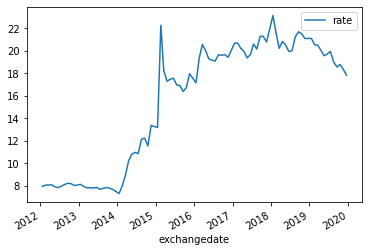

In [ ]:
plot_features = df.loc[df['cc'] == 'CAD', ['rate']]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
r030,5316.0,601.876599,298.574226,12.000000,368.000000,604.000000,934.000000,986.000
rate,5316.0,1070.198630,5101.803248,0.000377,0.164093,2.710726,10.300642,45252.165


In [ ]:
new_df = df.loc[df['cc'] == 'CAD', ['rate']]

In [ ]:
new_df

,rate
2,7.927783
63,8.028568
124,8.054211
185,8.056501
246,7.881619
...,...
5012,18.977909
5073,18.551173
5134,18.769960
5195,18.322074
